# Importing the necessary libraries

In [135]:
import numpy as np 
import pandas as pd 
import seaborn as sb
import math
import matplotlib.pyplot as plt
from sklearn.preprocessing import *
from sklearn.model_selection import *
from sklearn.ensemble import *
from sklearn.feature_selection import *
from sklearn.metrics import *
from sklearn.tree import *
from sklearn.svm import *
from sklearn.neighbors import *
from sklearn.linear_model import *
from sklearn.model_selection import KFold
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, AdaBoostRegressor, GradientBoostingRegressor




        

import warnings
with warnings.catch_warnings():
    warnings.filterwarnings("ignore")
        



# DATA GATHERING 

loading the training dataset

In [136]:
train = pd.read_csv('train-data.csv')

In [137]:
train

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,7.88 Lakh,4.75
6015,6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,NaN,4.00
6016,6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,NaN,2.90
6017,6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,NaN,2.65


In [138]:
train.shape

(6019, 14)

# checking the dtype and null values 

In [139]:
train = pd.read_csv('train-data.csv',index_col= 0)
train = train.reindex(np.random.permutation(train.index))
print("TRAIN SHAPE: ",train.shape)
train.info()
train.head()

TRAIN SHAPE:  (6019, 13)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 6019 entries, 625 to 5706
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   object 
 8   Engine             5983 non-null   object 
 9   Power              5983 non-null   object 
 10  Seats              5977 non-null   float64
 11  New_Price          824 non-null    object 
 12  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 658.3+ KB


,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
625,Honda City V MT,Pune,2013,127000,Petrol,Manual,Second,16.8 kmpl,1497 CC,116.3 bhp,5.0,NaN,4.50
2648,Honda BRV i-VTEC V MT,Pune,2016,9200,Petrol,Manual,First,15.4 kmpl,1497 CC,117.3 bhp,7.0,13.58 Lakh,8.00
3894,Toyota Innova 2.5 GX 7 STR,Hyderabad,2010,250000,Diesel,Manual,Second,12.8 kmpl,2494 CC,102 bhp,7.0,NaN,6.50
4797,Hyundai i20 1.2 Asta,Chennai,2011,47000,Petrol,Manual,First,17.0 kmpl,1197 CC,80 bhp,5.0,NaN,4.50
3813,Hyundai Grand i10 Sportz,Mumbai,2013,26000,Petrol,Manual,First,18.9 kmpl,1197 CC,82 bhp,5.0,NaN,3.75


## our  data is having 6019 rows and 13 coloumns,  here we can observe that 2 attributes are in float , and of type integer resp. and 9 attributes are of type object  each having non null count 

In [140]:
test = pd.read_csv('test-data.csv',index_col= 0)
print(test.shape)
print(test.info())
test.head()

(1234, 12)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1234 entries, 0 to 1233
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               1234 non-null   object 
 1   Location           1234 non-null   object 
 2   Year               1234 non-null   int64  
 3   Kilometers_Driven  1234 non-null   int64  
 4   Fuel_Type          1234 non-null   object 
 5   Transmission       1234 non-null   object 
 6   Owner_Type         1234 non-null   object 
 7   Mileage            1234 non-null   object 
 8   Engine             1224 non-null   object 
 9   Power              1224 non-null   object 
 10  Seats              1223 non-null   float64
 11  New_Price          182 non-null    object 
dtypes: float64(1), int64(2), object(9)
memory usage: 125.3+ KB
None


,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998 CC,58.2 bhp,4.0,NaN
1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796 CC,47.3 bhp,5.0,NaN
2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,7.0,25.27 Lakh
3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59 kmpl,1364 CC,null bhp,5.0,NaN
4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.5 kmpl,1197 CC,82.85 bhp,5.0,NaN


# DATA CLEANING AND ASSESSMENT

Ensure to apply the changes to both the test and train sets inorder to maintain uniformity.

##### Quality issue 1:  Missing values

We can see that there are missing values in the following columns:
* Engine          
* Power            
* Seats  
* New_Price          

### percentage of missing values

In [141]:
#percentage of missing values
percent_missing = train.isnull().sum() * 100 / len(train)
print(percent_missing)

Name                  0.000000
Location              0.000000
Year                  0.000000
Kilometers_Driven     0.000000
Fuel_Type             0.000000
Transmission          0.000000
Owner_Type            0.000000
Mileage               0.033228
Engine                0.598106
Power                 0.598106
Seats                 0.697790
New_Price            86.310018
Price                 0.000000
dtype: float64


### Here we can see that train  new price attributes , seats is  having  86.31%missing values 

In [142]:
percent_missing = test.isnull().sum() * 100 / len(test)
print(percent_missing)

Name                  0.000000
Location              0.000000
Year                  0.000000
Kilometers_Driven     0.000000
Fuel_Type             0.000000
Transmission          0.000000
Owner_Type            0.000000
Mileage               0.000000
Engine                0.810373
Power                 0.810373
Seats                 0.891410
New_Price            85.251216
dtype: float64


### here also in test datset we are having 85 % missing values in new price attribute 

In [143]:
percent_missing = train.isnull().sum() * 100 / len(train)
print(percent_missing)

Name                  0.000000
Location              0.000000
Year                  0.000000
Kilometers_Driven     0.000000
Fuel_Type             0.000000
Transmission          0.000000
Owner_Type            0.000000
Mileage               0.033228
Engine                0.598106
Power                 0.598106
Seats                 0.697790
New_Price            86.310018
Price                 0.000000
dtype: float64


## dropping the "New_Price" column that has 86.3% of missing values 

In [144]:


train.drop(columns =['New_Price'],axis =1, inplace = True)
test.drop(columns =['New_Price'],axis =1, inplace = True)

In [145]:
train.shape

(6019, 12)

## Mileage attribute has the least percentage of missing values. Let's fill them up manually.


In [146]:

train[train['Mileage'].isnull()]




,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
4446,Mahindra E Verito D4,Chennai,2016,50000,Electric,Automatic,First,NaN,72 CC,41 bhp,5.0,13.00
4904,Toyota Prius 2009-2016 Z4,Mumbai,2011,44000,Electric,Automatic,First,NaN,1798 CC,73 bhp,5.0,12.75


In [147]:
#Thanks to Google!

train.loc[4904, 'Mileage']  = '23.91 kmpl' 
train.loc[4446, 'Mileage']  = '14.0 kmpl'

## Now,let's drop the rest of the rows with missing values 

In [148]:



train.dropna(how ='any',inplace = True)
test.dropna(how ='any',inplace = True)

## CHECKING IF ALL THE MISSING VALUES ARE TAKEN CARE OF

In [149]:

train.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 5977 entries, 625 to 5706
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5977 non-null   object 
 1   Location           5977 non-null   object 
 2   Year               5977 non-null   int64  
 3   Kilometers_Driven  5977 non-null   int64  
 4   Fuel_Type          5977 non-null   object 
 5   Transmission       5977 non-null   object 
 6   Owner_Type         5977 non-null   object 
 7   Mileage            5977 non-null   object 
 8   Engine             5977 non-null   object 
 9   Power              5977 non-null   object 
 10  Seats              5977 non-null   float64
 11  Price              5977 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 607.0+ KB


In [150]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1223 entries, 0 to 1233
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               1223 non-null   object 
 1   Location           1223 non-null   object 
 2   Year               1223 non-null   int64  
 3   Kilometers_Driven  1223 non-null   int64  
 4   Fuel_Type          1223 non-null   object 
 5   Transmission       1223 non-null   object 
 6   Owner_Type         1223 non-null   object 
 7   Mileage            1223 non-null   object 
 8   Engine             1223 non-null   object 
 9   Power              1223 non-null   object 
 10  Seats              1223 non-null   float64
dtypes: float64(1), int64(2), object(8)
memory usage: 114.7+ KB


##### Quality issue 2:  Erroneous values and datatypes

Some of our attributes' datatypes could be changed inorder to make the modelling process easier. Those attributes are 
* Mileage
* Engine
* Power
* Year

#### Mileage - Before we change the datatype, we must extract the actual mileage in numbers without the "Kmpl" 

In [151]:

train['Mileage']= train['Mileage'].str[:-5]
train['Mileage']=train['Mileage'].astype(float);

test['Mileage']= test['Mileage'].str[:-5]
test['Mileage']=test['Mileage'].astype(float);

#### Engine - Before we change the datatype, we must extract the actual engine cc in numbers without the "CC" string same with power attributes seperating out bhp string and numeric values 

In [152]:


train['Engine'] = train['Engine'].str.strip('CC')
train['Engine']= train['Engine'].astype(float);

test['Engine'] = test['Engine'].str.strip('CC')
test['Engine']= test['Engine'].astype(float);

In [153]:
indx=train[train['Power']=='null bhp'].index
train.drop(indx,axis=0,inplace=True)

indx1=test[test['Power']=='null bhp'].index
test.drop(indx1,axis=0,inplace=True)

In [154]:
test['Power'] = test['Power'].str.strip('bhp ')
train['Power'] = train['Power'].str.strip('bhp ')

In [155]:
train['Power'] = train['Power'].astype(float)
test['Power'] = test['Power'].astype(float)

In [156]:
#Year
train['Year'] = train['Year'].astype(str)

test['Year'] = test['Year'].astype(str)


## CHECKING the datatypes of attributes 

In [157]:

train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5874 entries, 625 to 5706
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5874 non-null   object 
 1   Location           5874 non-null   object 
 2   Year               5874 non-null   object 
 3   Kilometers_Driven  5874 non-null   int64  
 4   Fuel_Type          5874 non-null   object 
 5   Transmission       5874 non-null   object 
 6   Owner_Type         5874 non-null   object 
 7   Mileage            5874 non-null   float64
 8   Engine             5874 non-null   float64
 9   Power              5874 non-null   float64
 10  Seats              5874 non-null   float64
 11  Price              5874 non-null   float64
dtypes: float64(5), int64(1), object(6)
memory usage: 596.6+ KB


In [158]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1201 entries, 0 to 1233
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               1201 non-null   object 
 1   Location           1201 non-null   object 
 2   Year               1201 non-null   object 
 3   Kilometers_Driven  1201 non-null   int64  
 4   Fuel_Type          1201 non-null   object 
 5   Transmission       1201 non-null   object 
 6   Owner_Type         1201 non-null   object 
 7   Mileage            1201 non-null   float64
 8   Engine             1201 non-null   float64
 9   Power              1201 non-null   float64
 10  Seats              1201 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 112.6+ KB


In [159]:
train.to_csv('trainfinal.csv')
test.to_csv('testfinal.csv')

# Feature engineering
Feature engineering is the pre-processing step of machine learning, which is used to transform raw data into features that can be used for creating a predictive model using Machine learning

In [160]:
x = pd.read_csv('trainfinal.csv')
print(x.shape)
x.head()

(5874, 13)


,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,625,Honda City V MT,Pune,2013,127000,Petrol,Manual,Second,16.8,1497.0,116.3,5.0,4.50
1,2648,Honda BRV i-VTEC V MT,Pune,2016,9200,Petrol,Manual,First,15.4,1497.0,117.3,7.0,8.00
2,3894,Toyota Innova 2.5 GX 7 STR,Hyderabad,2010,250000,Diesel,Manual,Second,12.8,2494.0,102.0,7.0,6.50
3,4797,Hyundai i20 1.2 Asta,Chennai,2011,47000,Petrol,Manual,First,17.0,1197.0,80.0,5.0,4.50
4,3813,Hyundai Grand i10 Sportz,Mumbai,2013,26000,Petrol,Manual,First,18.9,1197.0,82.0,5.0,3.75


#### dropping the unnamed:0 column

In [161]:

x.drop(columns=['Unnamed: 0'],axis=1,inplace = True)

**The name column has a diverse number of values. 
Let's break it down and extract the brand name of the car.**


In [162]:
x["breakdown"] = x.Name.str.split(" ")
x["breakdown"].head()

0                 [Honda, City, V, MT]
1          [Honda, BRV, i-VTEC, V, MT]
2    [Toyota, Innova, 2.5, GX, 7, STR]
3            [Hyundai, i20, 1.2, Asta]
4        [Hyundai, Grand, i10, Sportz]
Name: breakdown, dtype: object

### Lets store the brand name in our new column

In [163]:

brand_list=[]
for i in range(len(x)):
    a = x.breakdown[i][0]
    brand_list.append(a)

x['Brand'] = brand_list

In [164]:
# We don't need these columns now
x.drop(columns=['Name','breakdown'],axis=1,inplace=True)

### Lets analyse the new attribute

In [165]:

x['Fuel_Type'].unique()

array(['Petrol', 'Diesel', 'CNG', 'LPG', 'Electric'], dtype=object)

In [166]:

x['Brand'].unique()

array(['Honda', 'Toyota', 'Hyundai', 'Maruti', 'Mahindra', 'Ford',
       'Renault', 'Mercedes-Benz', 'BMW', 'Chevrolet', 'Volkswagen',
       'Land', 'Porsche', 'Tata', 'Skoda', 'Mitsubishi', 'Nissan', 'Audi',
       'Fiat', 'Jaguar', 'Mini', 'Bentley', 'Force', 'Jeep', 'Volvo',
       'Datsun', 'ISUZU', 'Ambassador', 'Lamborghini', 'Isuzu'],
      dtype=object)

We can see that "Isuzu" carries some duplicated values. 
<br>
Let's sort that out

In [167]:
duplic = {'ISUZU': 'Isuzu'}
x.replace({"Brand": duplic},inplace = True) 

In [168]:
#CHECKING
x['Brand'].value_counts()

#Sorted!

Maruti           1175
Hyundai          1058
Honda             600
Toyota            395
Mercedes-Benz     316
Volkswagen        314
Ford              294
Mahindra          269
BMW               262
Audi              235
Tata              183
Skoda             172
Renault           145
Chevrolet         120
Nissan             89
Land               57
Jaguar             40
Mitsubishi         27
Mini               26
Fiat               23
Volvo              21
Porsche            16
Jeep               15
Datsun             13
Isuzu               3
Force               3
Bentley             1
Ambassador          1
Lamborghini         1
Name: Brand, dtype: int64

## Lets encode our categorical values 

In [169]:


labelencoder = LabelEncoder()
label_array=[]

label_array = ['Location','Year','Fuel_Type','Transmission','Owner_Type','Brand']

for ele in label_array:
    x[ele] = labelencoder.fit_transform(x[ele])


In [170]:
#CHECKING
x.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand
0,10,15,127000,4,1,2,16.8,1497.0,116.3,5.0,4.50,9
1,10,18,9200,4,1,0,15.4,1497.0,117.3,7.0,8.00,9
2,5,12,250000,1,1,2,12.8,2494.0,102.0,7.0,6.50,26
3,2,13,47000,4,1,0,17.0,1197.0,80.0,5.0,4.50,10
4,9,15,26000,4,1,0,18.9,1197.0,82.0,5.0,3.75,10


## feature selection

In [171]:

X_fs = x[['Location', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission', 'Owner_Type',
       'Mileage', 'Engine', 'Power', 'Seats', 'Brand']]

y_fs = x['Price']


y_fs = y_fs*100
y_fs = y_fs.astype(int)


bestfeatures = SelectKBest(score_func=chi2, k=5)
fit = bestfeatures.fit(X_fs,y_fs)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X_fs.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
fea = pd.DataFrame(featureScores.nlargest(10,'Score'))
print(featureScores.nlargest(10,'Score'))  #print 10 best features

                Specs         Score
2   Kilometers_Driven  2.646175e+08
7              Engine  8.785410e+05
8               Power  1.170354e+05
10              Brand  6.291769e+03
5          Owner_Type  2.423341e+03
6             Mileage  2.241475e+03
1                Year  2.015923e+03
3           Fuel_Type  2.011687e+03
0            Location  1.808910e+03
4        Transmission  1.002323e+03


# Therefore, the most important features are "Kilometers driven" followed by "Engine", "Power", "Brand".

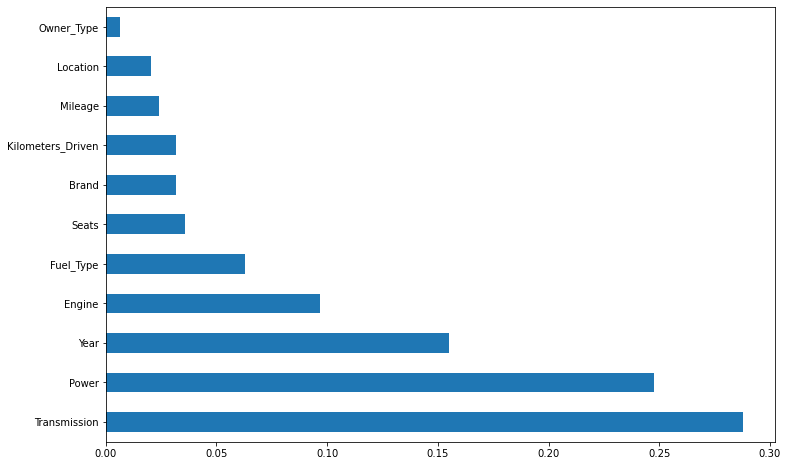

In [172]:
selection= ExtraTreesRegressor()
selection.fit(X_fs,y_fs)

plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X_fs.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()


## This plot also validates our selection of important features. 

In [173]:
y_fs


0       450
1       800
2       650
3       450
4       375
       ... 
5869    150
5870    200
5871    350
5872    630
5873    986
Name: Price, Length: 5874, dtype: int32

# MODEL BUILDING

### Preparing Training se

In [174]:

X = np.array(x.drop(['Price'],axis = 1)) 
Y = x.Price.values

## splitting in train test 

In [175]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.20, random_state=25)

print("X_test shape:", X_test.shape)
print("X_train shape:", X_train.shape)
print("Y_test shape: ", Y_test.shape)
print("Y_train shape:", Y_train.shape)

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_test shape: (1175, 11)
X_train shape: (4699, 11)
Y_test shape:  (1175,)
Y_train shape: (4699,)


## 1. linear  regression 

In [176]:
model = LinearRegression()

model.fit(X_train, Y_train)

pred = model.predict(X_test)


In [177]:
model.score(X_test,pred)


1.0

In [178]:
import sklearn.metrics as metrics

### here we can see that the metrices for the linear regression model is having mean absolute error, mean squre error and r 2 score  as follws :-
* MAE:  3.7705582986157813
* MSE:  37.58518408727565
* R2 score:  0.5801078926580725
* RMSE :  6.130676

### from the above metrices we can conclude that model need to have be more optimal resulting  low value of  metrices 

In [179]:

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print("MAE: ", (metrics.mean_absolute_error(pred, Y_test)))
print("MSE: ", (metrics.mean_squared_error(pred, Y_test)))
print("R2 score: ", (metrics.r2_score(pred, Y_test)))
rmse = np.sqrt(metrics.mean_squared_error(Y_test, pred))
print("RMSE : % f" %(rmse))

MAE:  3.7705582986157813
MSE:  37.58518408727565
R2 score:  0.5801078926580725
RMSE :  6.130676


RMSE :commonly used measures for evaluating the quality of predictions. It shows how far predictions fall from measured true values 
    If the RMSE for the test is much higher than that of the training set, it is likely that we have badly over fit the data, i.e. we have created a model that tests well in sample, but has little predictive value when tested out of sample.

# 2. Decision Tree Regressor 

In [180]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
model.fit(X_train, Y_train)
pred= model.predict(X_test)

### here we can observe that decision tree regressor is producing more accurate result as compared to linear model as metrics values of mean absolute error , mean squre error values got reduced  , and r 2 score got increased

In [181]:
from sklearn.metrics import mean_absolute_error
print("MAE: ", (metrics.mean_absolute_error(pred, Y_test)))
print("MSE: ", (metrics.mean_squared_error(pred, Y_test)))
print("R2 score: ", (metrics.r2_score(pred, Y_test)))
rmse = np.sqrt(metrics.mean_squared_error(Y_test, pred))
print("RMSE : % f" %(rmse))

MAE:  2.019160283687943
MSE:  28.134410009456264
R2 score:  0.7781018946743732
RMSE :  5.304188


Lower values of RMSE indicate better fit.
The lower the RMSE, the better a given model is able to “fit” a dataset.

# 3. Random Forest Regressor 

In [182]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error as mae

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.25, random_state=0)
model = RandomForestRegressor(random_state=1)
model.fit(X_train, Y_train)
pred = model.predict(X_test)

In [183]:
from sklearn.metrics import mean_absolute_error
print("MAE: ", (metrics.mean_absolute_error(pred, Y_test)))
print("MSE: ", (metrics.mean_squared_error(pred, Y_test)))
print("R2 score: ", (metrics.r2_score(pred, Y_test)))
rmse = np.sqrt(metrics.mean_squared_error(Y_test, pred))
print("RMSE : % f" %(rmse))

MAE:  1.5017894787513368
MSE:  10.85872853452442
R2 score:  0.8942806738949218
RMSE :  3.295258


Here, R2 score got increased, the higher the R-squared, the better the model fits your data

# 4. Gradient Boosting Regressor

In [184]:

model = GradientBoostingRegressor()
model.fit(X_train, Y_train)
pred = model.predict(X_test)



In [185]:
from sklearn.metrics import mean_absolute_error
print("MAE: ", (metrics.mean_absolute_error(pred, Y_test)))
print("MSE: ", (metrics.mean_squared_error(pred, Y_test)))
print("R2 score: ", (metrics.r2_score(pred, Y_test)))
rmse = np.sqrt(metrics.mean_squared_error(Y_test, pred))
print("RMSE : % f" %(rmse))

MAE:  1.705947689373957
MSE:  10.90467045731623
R2 score:  0.8947487714525375
RMSE :  3.302222


In [186]:
import xgboost as xg
from sklearn.metrics import mean_squared_error as MSE
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

# 5. xgb regressor

In [187]:
xgb_r = xg.XGBRegressor(objective ='reg:linear',
                  n_estimators = 100, seed = 123)
 
# Fitting the model
xgb_r.fit(X_train, Y_train)
 
# Predict the model
pred = xgb_r.predict(X_test)
 


from sklearn.metrics import mean_absolute_error
print("MAE: ", (metrics.mean_absolute_error(pred, Y_test)))
print("MSE: ", (metrics.mean_squared_error(pred, Y_test)))
print("R2 score: ", (metrics.r2_score(pred, Y_test)))
# RMSE Computation
rmse = np.sqrt(MSE(Y_test, pred))
print("RMSE : % f" %(rmse))

MAE:  1.368200062168464
MSE:  9.43618017020281
R2 score:  0.9115482386132322
RMSE :  3.071837


 Lower values of RMSE indicate better fit.
The lower the RMSE, the better a given model is able to “fit” a dataset.here in XG BOOST regressor it implies highest R2score and lowest RMSE among all other models

In [188]:
#xgb_r.fit(X,Y)

In [189]:
#from joblib import Parallel, delayed
#import joblib


# Save the model as a pickle in a file
#joblib.dump(xgb_r, 'model.pkl')

# Load the model from the file



AND THERE WE HAVE A WINNER TO GO THROUGH GRIDSEARCH FOR HYPER-PARAMTER TUNING!!

 ### Tuning HyperParameters for xgboost

##### GRID SEARCH

Grid Search can be thought of as an exhaustive and computationally expensive method for selecting a model.<br>

**For example** : <br>

Searching 20 different parameter values for each of 4 parameters will require 160,000 trials of cross-validation. This equates to 1,600,000 model fits and 1,600,000 predictions if 10-fold cross validation is used

In [190]:
#We use GridSearch for fine tuning Hyper Parameters

from sklearn.model_selection import *


n_estimator_val = np.arange(100,400,100).astype(int)
max_depth_val = [2,3,4]


grid_params = { 'learning_rate' : [0.1],
               'n_jobs': [-1],
               'n_estimators' : n_estimator_val,
               'max_depth' : max_depth_val
              }

In [191]:
gs = GridSearchCV(xgb.XGBRegressor(),grid_params,verbose=1,cv=5,n_jobs =-1)
gs_results = gs.fit(X_train,Y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


### To Display the Best Score

In [192]:

gs_results.best_score_

0.9071962570393127

### To Display the Best Estimator

In [193]:

gs_results.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=4, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=300,
             n_jobs=-1, num_parallel_tree=1, predictor='auto', random_state=0,
             reg_alpha=0, reg_lambda=1, ...)

### To Display the Best Parameters


In [194]:
gs_results.best_params_

{'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 300, 'n_jobs': -1}

We could settle here but let's try randomized search cross validation.

##### RANDOMIZED SEARCH
Randomized Search sets up a grid of hyperparameter values and selects random combinations to train the model and score.
This allows you to explicitly control the number of parameter combinations that are attempted. 
The number of search iterations is set based on time or resources. 


While it’s possible that RandomizedSearchCV will not find as accurate of a result as GridSearchCV, it surprisingly picks the best result more often than not and in a fraction of the time it takes GridSearchCV would have taken. Given the same resources, Randomized Search can even outperform Grid Search. 

In [195]:
xgbr=xgb.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.8, gamma=0.5,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=4, min_child_weight=10, missing= None, n_estimators=1900,
       n_jobs=-1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1.0, verbosity=1)

In [196]:
folds = 4
param_comb = 10

skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)

params = { 'n_jobs': [-1],
        'n_estimators' : n_estimator_val,
        'learning_rate' : [0.1],
        'min_child_weight': [9],
        'gamma': [0.5],
        'subsample': [0.6],
        'colsample_bytree': [0.8, 1.0],
        'max_depth': [3, 4]
        }
xgb_regrsv = xgb.XGBRegressor()


In [197]:
random_search = RandomizedSearchCV(xgb_regrsv, params, n_iter=param_comb, scoring='r2', 
                                   n_jobs=-1, cv=10 )


In [198]:
random_search.fit(X_train, Y_train);

In [199]:
random_search.best_score_

0.9117690415341615

In [200]:
random_search.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1.0,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0.5, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=4, max_leaves=0, min_child_weight=9,
             missing=nan, monotone_constraints='()', n_estimators=300,
             n_jobs=-1, num_parallel_tree=1, predictor='auto', random_state=0,
             reg_alpha=0, reg_lambda=1, ...)

After some more time of trying various hyperparameters and tuning,

In [201]:
xgb_tuned = xgb.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.8, gamma=0.5,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=4, min_child_weight=9, missing=np.nan, n_estimators=300,
       n_jobs=-1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1.0, verbosity=0)

In [202]:
xgb_tuned.fit(X_train,Y_train)
y_pred =xgb_tuned.predict(X_test)

print("Training set accuracy: ",xgb_tuned.score(X_train,Y_train))
print("Test set accuracy    : ",xgb_tuned.score(X_test,Y_test))

Training set accuracy:  0.9766318073352496
Test set accuracy    :  0.9180405345235487


Now, lets check how various metrics have evaluated our model on the test set

In [203]:

print("\t\tError Table")
print('Mean Absolute Error      : ', mean_absolute_error(Y_test, y_pred))
print('Mean Squared  Error      : ', mean_squared_error(Y_test, y_pred))
print('Root Mean Squared  Error : ', np.sqrt(mean_squared_error(Y_test, y_pred)))
print('R Squared Error          : ', r2_score(Y_test, y_pred))

		Error Table
Mean Absolute Error      :  1.360548466045975
Mean Squared  Error      :  9.153331821022785
Root Mean Squared  Error :  3.0254473753517486
R Squared Error          :  0.9180405345235487


# cross validation strategy

Cross Validation is used to assess the predictive performance of the models and and to judge how they perform outside the sample to a new data set also known as test data The motivation to use cross validation techniques is that when we fit a model, we are fitting it to a training dataset. Without cross validation we only have information on how does our model perform to our in-sample data. Ideally we would like to see how does the model perform when we have a new data in terms of accuracy of its predictions. In science, theories are judged by its predictive performance.

We use the cross_val_score function of Sklearn. However this function has not a shuffle attribut, we add then one line of code, in order to shuffle the dataset prior to cross-validation

In [208]:
#Validation function
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(X_train.values)
    rmse= np.sqrt(-cross_val_score(model, X_train.values, y_train.values, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [209]:
from sklearn.model_selection import KFold, cross_val_score, train_test_split
random_model = RandomForestRegressor(n_estimators=300, max_depth=4)
#Fit
random_model.fit(X_train, Y_train)
xgb_accuracy = round(random_model.score(X_train,Y_train)*100,2)
print(round(xgb_accuracy,2),'%')

84.26 %


# CONCLUSION

This model is ready to be deployed in a pipeline. <br>
We have accomplished the task of building a good model for our used cars' prediction purposes. 




